In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

[Data for example is from Kaggle](kaggle.com/datasets/michellevp/dataset-phishing-domain-detection-cybersecurity)

In [2]:
df = pd.read_csv('replace with your file')

In [3]:
# Step 1: Prepare the Data
X = df.drop(columns=['phishing'])
y = df['phishing']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Step 2: Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Step 3: Evaluate the Model
y_pred = rf_model.predict(X_test)

In [7]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[22947   279]
 [  221 15463]]


In [9]:
# Classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23226
           1       0.98      0.99      0.98     15684

    accuracy                           0.99     38910
   macro avg       0.99      0.99      0.99     38910
weighted avg       0.99      0.99      0.99     38910



In [10]:
# Step 4: Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

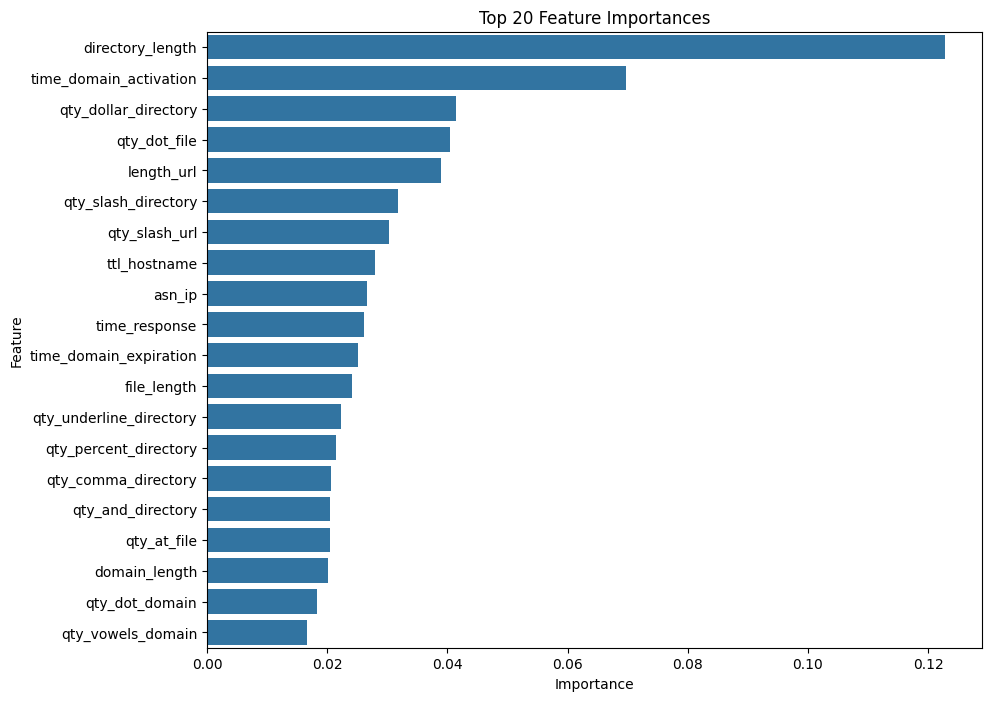

In [11]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [12]:
# Extract one tree from the Random Forest (e.g., the first tree)
estimator = rf_model.estimators_[0]

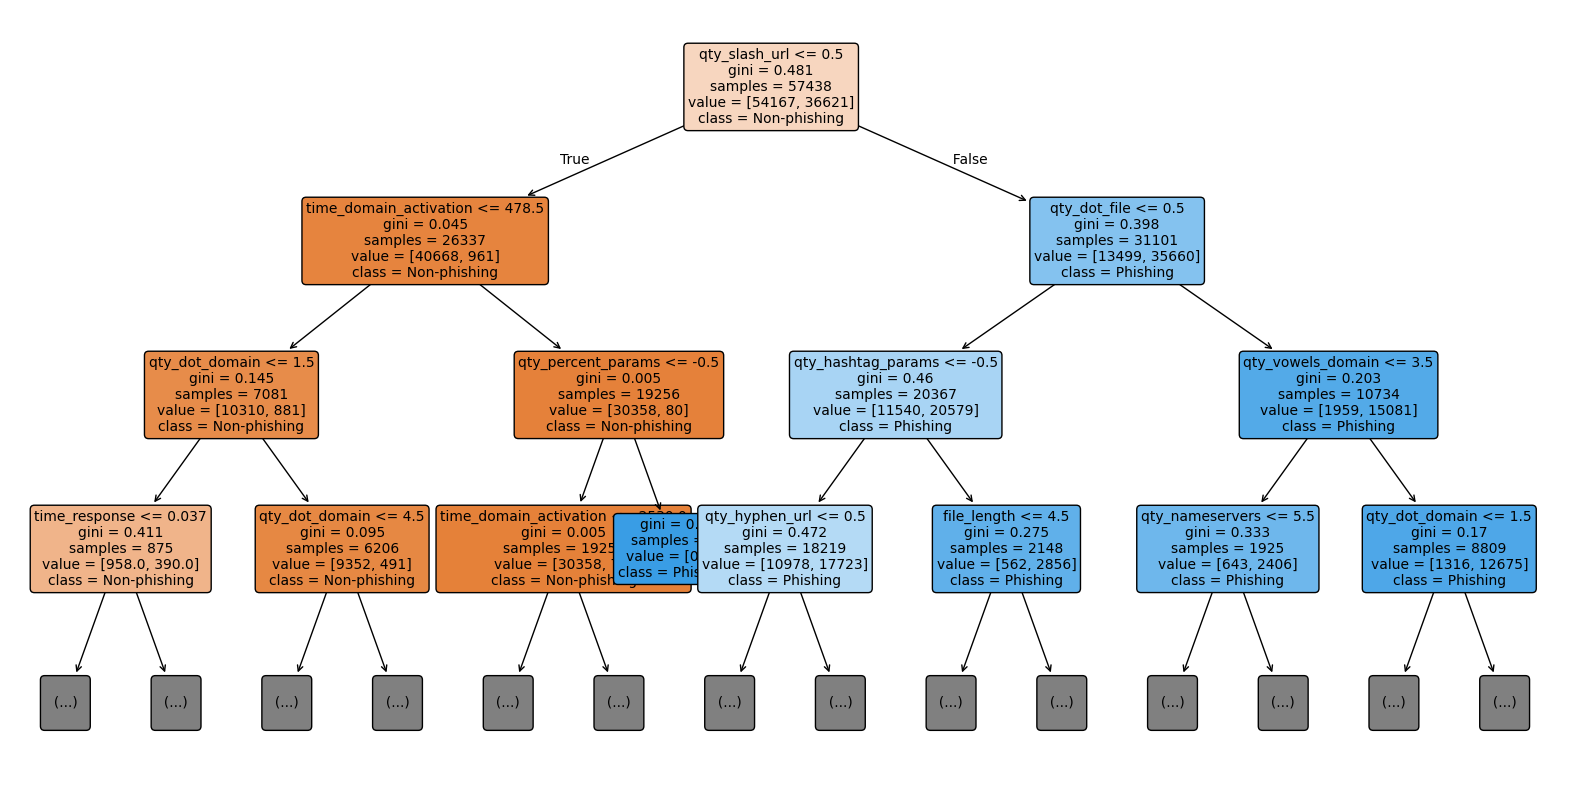

In [13]:
# Plot the tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          feature_names=X.columns, 
          class_names=['Non-phishing', 'Phishing'], 
          filled=True, 
          rounded=True,
          max_depth=3,  # Limiting depth for better visualization
          fontsize=10)
plt.savefig('random_forest_tree.png', dpi=300, bbox_inches='tight')
plt.show()